<a href="https://colab.research.google.com/github/amoladmane/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

## Step 1 - read data set

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## target feature is PE ( Power Plant Energy Output)

## Step2 - basic data quality check


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
df.duplicated().sum()

41

In [5]:
df.duplicated().sum()/len(df)

0.004285117056856187

## Step 3 - seprate X and Y ( PE )

In [6]:
X = df.drop(columns =['PE'])
Y = df[['PE']]

In [7]:
X[0:5]

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [8]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4 - Preprocissing ( scaling data )

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


## Step 5 - Apply train test split
20% data seen to model

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre, Y, test_size=0.20, random_state=22)

In [13]:
xtrain.shape

(7654, 4)

In [14]:
xtest.shape

(1914, 4)

In [15]:
ytest.head()

,PE
4938,459.48
2807,438.23
8607,465.56
3998,428.62
6597,435.70


## Step 5 - Build Keras Neural Network

In [16]:
from keras.models import Sequential

In [17]:
from keras.layers import Dense, Input

In [18]:
# initilise the sequential model
model = Sequential()
# add input layer
model.add(Input(shape=(xtrain.shape[1],)))
# add hidden layer 1
model.add(Dense(units=8, activation='relu'))
# add hidden layer 2
model.add(Dense(units=4,activation='relu'))
# add output layer
model.add(Dense(units=1, activation='linear'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])



In [21]:
hist=model.fit(xtrain,ytrain, validation_split=0.20, epochs=100,)

Epoch 1/100
192/192 [==============================] - 3s 7ms/step - loss: 206262.0156 - mae: 453.8353 - val_loss: 204308.7500 - val_mae: 451.6950
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 203144.7812 - mae: 450.3777 - val_loss: 199174.8750 - val_mae: 445.9606
Epoch 3/100
192/192 [==============================] - 1s 5ms/step - loss: 194900.6406 - mae: 441.0833 - val_loss: 187531.9062 - val_mae: 432.6349
Epoch 4/100
192/192 [==============================] - 1s 5ms/step - loss: 179185.8750 - mae: 422.7068 - val_loss: 167890.0469 - val_mae: 409.0196
Epoch 5/100
192/192 [==============================] - 1s 8ms/step - loss: 155625.4531 - mae: 393.2829 - val_loss: 141054.4531 - val_mae: 373.9568
Epoch 6/100
192/192 [==============================] - 1s 7ms/step - loss: 126186.5312 - mae: 352.4826 - val_loss: 110133.8125 - val_mae: 328.0786
Epoch 7/100
192/192 [==============================] - 1s 5ms/step - loss: 94922.8828 - mae: 302.0420 - val_loss: 7987

## Evaluate Model

In [22]:
model.evaluate(xtrain,ytrain)

240/240 [==============================] - 0s 2ms/step - loss: 19.9022 - mae: 3.5248


[19.90220832824707, 3.5248219966888428]

In [23]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 2ms/step - loss: 20.0080 - mae: 3.5973


[20.007970809936523, 3.597266674041748]

## Plot the learning curve ro check whether model trained well or not

In [24]:
hist.history['mae']

[453.8353271484375,
 450.377685546875,
 441.083251953125,
 422.70684814453125,
 393.2828674316406,
 352.4825744628906,
 302.0419616699219,
 245.95590209960938,
 193.41220092773438,
 154.6751251220703,
 132.19068908691406,
 119.81105041503906,
 112.11881256103516,
 105.91663360595703,
 100.01966857910156,
 94.16432189941406,
 88.21147918701172,
 82.14290618896484,
 75.94365692138672,
 69.64022064208984,
 63.209442138671875,
 56.79988479614258,
 50.482784271240234,
 44.36063766479492,
 38.49385070800781,
 32.83096694946289,
 27.901620864868164,
 23.483030319213867,
 19.701812744140625,
 16.590726852416992,
 14.1035795211792,
 12.212557792663574,
 10.5759859085083,
 9.306864738464355,
 8.280586242675781,
 7.407835960388184,
 6.757670879364014,
 6.210825443267822,
 5.782513618469238,
 5.354792594909668,
 5.113827228546143,
 4.815292835235596,
 4.591907978057861,
 4.435854434967041,
 4.300973892211914,
 4.216607570648193,
 4.087042331695557,
 4.015997409820557,
 3.940621852874756,
 3.910060

In [25]:
hist.history['val_loss']

[204308.75,
 199174.875,
 187531.90625,
 167890.046875,
 141054.453125,
 110133.8125,
 79870.9921875,
 54781.53515625,
 37395.15625,
 27230.103515625,
 21837.595703125,
 18808.314453125,
 16728.14453125,
 14973.15234375,
 13332.7080078125,
 11763.814453125,
 10246.3291015625,
 8806.546875,
 7463.37939453125,
 6222.9345703125,
 5099.38330078125,
 4105.4443359375,
 3246.7998046875,
 2524.97412109375,
 1933.2950439453125,
 1461.0699462890625,
 1089.564697265625,
 805.6149291992188,
 595.5087890625,
 441.4629821777344,
 331.5565185546875,
 253.5049591064453,
 197.80398559570312,
 156.5638885498047,
 126.87167358398438,
 104.2734603881836,
 87.78266906738281,
 73.94734191894531,
 63.88578796386719,
 55.7834587097168,
 48.94626235961914,
 43.9657096862793,
 39.31372833251953,
 35.9254264831543,
 33.679039001464844,
 30.891101837158203,
 29.013092041015625,
 27.636898040771484,
 26.62379264831543,
 25.399036407470703,
 24.50686264038086,
 24.081228256225586,
 23.433509826660156,
 22.757631301

In [26]:
import matplotlib.pyplot as plt

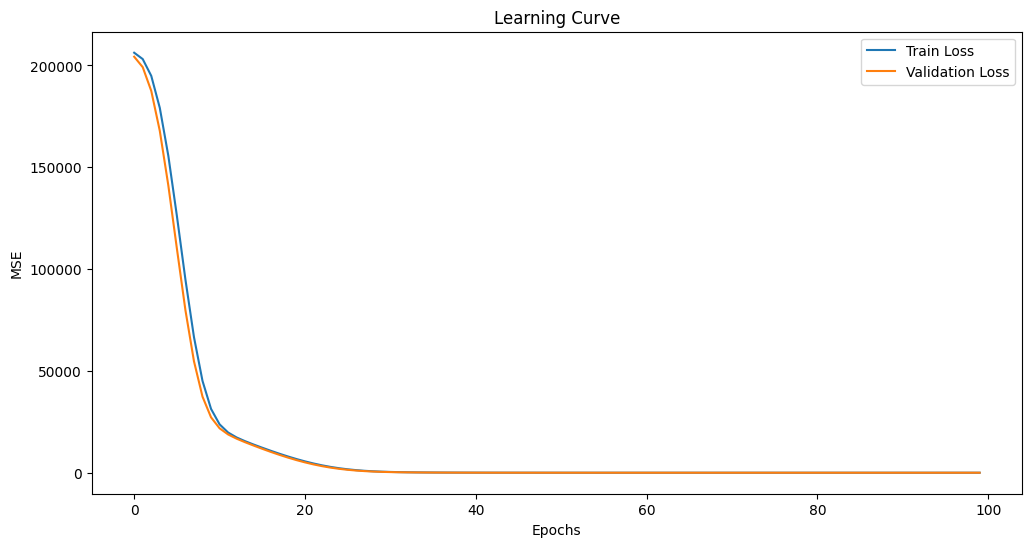

In [28]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Predict the result for train and test

In [30]:
ypred_train=model.predict(xtrain)
ypred_test=model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [31]:
 ypred_train[0:5]

array([[447.0045 ],
       [456.89954],
       [449.65408],
       [445.0414 ],
       [445.47244]], dtype=float32)

In [34]:
ytrain.head()

,PE
2711,444.38
5538,455.71
508,446.33
3512,448.37
7585,444.54


In [35]:
ypred_test[0:5]

array([[463.2705 ],
       [437.1587 ],
       [465.12213],
       [434.49277],
       [440.74002]], dtype=float32)

In [36]:
ytest.head()

,PE
4938,459.48
2807,438.23
8607,465.56
3998,428.62
6597,435.70


In [38]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
def evmodel (model,x,y):
  ypred = model.predict(x)
  mse = mean_squared_error(y,ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y,ypred)
  r2 = r2_score(y,ypred)
  print(f'mean Sqaured error : {mse:.2f}')
  print(f'Root mean squared error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score :{r2:.4f}')

In [43]:
evmodel(model,xtrain,ytrain)

240/240 [==============================] - 1s 5ms/step
mean Sqaured error : 19.90
Root mean squared error : 4.46
Mean Absolute Error : 3.52
R2 Score :0.9315


In [44]:
evmodel(model,xtest,ytest)

60/60 [==============================] - 0s 6ms/step
mean Sqaured error : 20.01
Root mean squared error : 4.47
Mean Absolute Error : 3.60
R2 Score :0.9318


## R2 score is 0.93 > 0.8, hence it is good model

## Saving the model (.kears)

In [51]:
model.save('Power Output.keras')

## Load the above model

In [54]:
from keras.models import load_model

In [56]:
m=load_model('/content/Power Output.keras')

In [57]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[-1.1360106 , -1.0301715 ,  0.18581282,  0.82172734, -0.11868887,
          0.5768888 ,  0.83047926, -1.3672177 ],
        [-1.041459  , -1.8690453 ,  0.31606865,  1.5206844 ,  0.10125592,
          1.2363342 ,  0.7959989 , -1.1596318 ],
        [ 0.32853192, -0.44900966,  1.2318118 , -0.48607033, -0.93523234,
         -0.6724881 , -0.7359813 ,  0.7691567 ],
        [ 0.15986454,  0.08179625, -1.0596871 ,  0.82703835,  0.22811249,
          0.05033917, -0.3382783 ,  0.09824442]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([4.928987 , 4.801223 , 5.1919637, 4.718364 , 0.0054987, 4.8064275,
        4.866873 , 4.8550463], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 3.530997  ,  0.27269155, -0.6144944 ,  0.1946344 ],
        [ 3.6604908 , -0.5217685 , -0.7010436 , -0.23155609],
        [ 3.5159302 , -0.8164793 , -0.48760948, 